# Método de Clustering Hierárquico

#### Este método de agrupamento de dados consiste em unir pares de dados usando uma distância de linkagem. A análise gráfica foi realisada pela plotagem de um dendrograma. Um dendrograma é uma estrutura em formato de árvore, que explica a relação entre cada ponto de dado de um Dataset

In [1]:
#Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.cluster.hierarchy import dendrogram

#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df_chem["Refractive Index"] == 0.000)] #remove as linhas (objetos), cujo valor do índice de refração é 0

df_chem = df_chem.drop(df_remove.index) #considera que o dataframe df_chem é o dataframe com as linhas removidas
print(df_chem)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2        0.122631               6.234  

#### Reindexação do Dataframe, e definição de atributos e alvo

In [2]:
nome = 'df_chem'
atributos = ["Specific Gravity", "Mohs Hardness", 'Molar Mass', 'Molar Volume', 'Calculated Density']
target = ["Refractive Index"]
#df_chem_r2 = df_chem.reindex(atributos, axis=1)

#### Escalonamento padrão do Dataframe

In [3]:
sc = StandardScaler() #Função que escalona
sc.fit(df_chem)     #Fit dos dados escalonados
df_chem_norma = sc.transform(df_chem)

In [4]:
print(df_chem_norma)

[[ 0.31604369  0.11090477 -0.55014037  0.72958684  0.23546097  0.26051248]
 [-0.57569712  0.24368401 -0.50042672 -0.08330322 -0.42196401  0.60854766]
 [-0.95787176  0.87148485  1.54197547  0.95021632  0.22805018  0.53272704]
 ...
 [-0.19352249 -0.57232818 -0.50871233  0.03964661 -0.20236363  0.15288418]
 [ 1.58995914  0.22112443 -0.48385551 -0.44797117 -0.09597107 -0.86829024]
 [-1.97700411  0.05031619 -0.33057178  0.21808873 -0.20198016  0.47983752]]


#### Definição do método Hierárquico e seus atributos

In [5]:
hierarquico = AgglomerativeClustering(
    n_clusters = None,       #Numero de clusters
    affinity = 'euclidean',  #Métrica que computa as distâncias
    #memory = None,
    connectivity = None,     #Define uma matriz de conectividade, no caso de querermos uma hierarquia estruturada
    compute_full_tree = 'auto',  #Computa toda a árvore hierarquica, ou se em auto, para de computar após atingir o numero de clusters definido
    linkage = 'ward',            #Critério de linkagem, que irá definir quais distancias usar entre cada ramificação
    distance_threshold = 0,      #Distancia de linkagem até onde os clusters não serão unidos
    compute_distances = False    #Computa as distâncias em um grafico de dendrograma
)

yhierarquico = hierarquico.fit_predict(df_chem_norma)
print(yhierarquico)

[575 490 353 569 406 417 339 587 451 319 535 479 411 547 561 385 578 320
 377 412 546 525 450 467 335 499 367 421 486 344 375 368 553 465 526 382
 586 423 384 529 541 326 585 453 409 389 345 444 468 543 422 427 342 381
 527 555 563 358 404 508 414 348 556 446 403 570 521 455 361 480 501 519
 487 443 429 517 307 415 351 372 419 507 352 354 573 399 430 337 506 336
 540 329 420 562 431 505 343 580 548 482 322 565 559 566 491 369 253 522
 316 442 579 509 306 459 176 296 428 485 376 493 327 277 371 471 378 317
 388 574 545 572 400 497 557 393 328 273 537 315 311 436 214 460 418 539
 282 568 489 445 433 495 551 496 512 221 461 392 536 340 514 518 504 262
 280 434 472 374 331 533 373 523 435 528 309 201 323 549 186 365 360 534
 576 425 338 439 531 426 510 516 524 324 477 500 466 357 402 297 520 532
 457 511 560 462 452 386 349 175 217 355 310 350 213 154 567 475 538 408
 463 239 222 347 390  87 205 416 395 252 564 476 209 502 260 298 530 552
 401 554 303 173 469 410 279 314 456 513 481 276 21

#### Graficando os grupos formados por Dendrograma

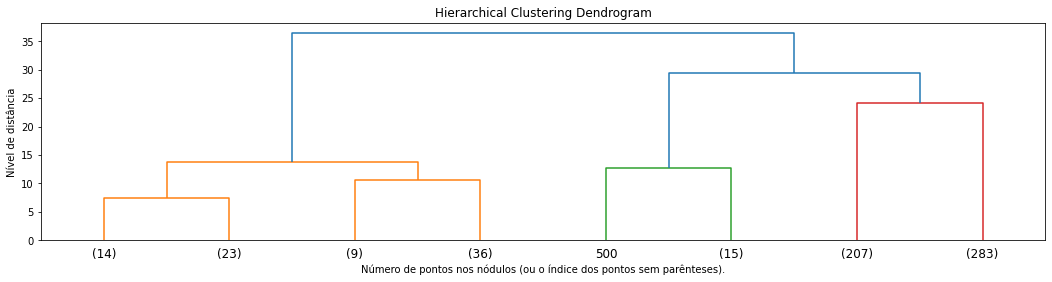

In [6]:
def plot_dendrogram(model, **kwargs):
    """Cria uma matriz de linkagem e plota o dendrograma"""

    # Define a numeração da quantidade de nódulos de cada amostra
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Nódulo das folhas
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plota o dendrograma correspondente
    dendrogram(linkage_matrix, **kwargs)


hierarquico_1 = hierarquico.fit(df_chem_norma)
fig = plt.figure(figsize=(18, 4))
plt.title("Hierarchical Clustering Dendrogram")
# Plota os 4 primeiros Componentes Principais
plot_dendrogram(hierarquico_1, truncate_mode="level", p=2)
plt.xlabel("Número de pontos nos nódulos (ou o índice dos pontos sem parênteses).")
plt.ylabel("Nível de distância")
plt.show()

Nesta primeira análise, foi definido o parâmetro p = 2 a fim de analisarmos apenas as 2 ramificações (agrupamentos) principais. É visivel pelo dendrograma, que o cluster de cor verde possui maior quantidade de dados, enquanto uma ramificação do agrupamento laranja possui apenas 14 dados. além disso, o agrupamento verde possui maior nível de distância do agrupamento geral (azul) ou seja, os dados deste agrupamento tem menor relação com os demais dados.

### Análise de Componentes Principais do DataFrame (PCA)

In [7]:
pca = PCA()
pca.fit(df_chem_norma)  #Fita o Dataframe
df_chem_pca = pca.transform(df_chem_norma)  #Transforma o Dataframe fitado em um que contenha suas componentes principais
print(df_chem_pca)

[[ 0.34268347  0.55441658  0.36455745 -0.49340782 -0.47547067 -0.20786539]
 [-0.28738881 -0.08496878 -0.71623109 -0.63190259 -0.44050021 -0.02046882]
 [-0.92427077  1.70881583 -0.88098591  0.64527688  0.4749193  -0.31782664]
 ...
 [ 0.40961566 -0.29150617 -0.20492245 -0.61663841  0.09827302 -0.07099743]
 [ 0.10301581 -0.88614878  1.56989048  0.39953219 -0.58905549 -0.08808192]
 [ 0.17963852  0.30698893 -2.00078067 -0.40945517 -0.13088717 -0.15664271]]


In [8]:
hierarquico_pca = AgglomerativeClustering(
    n_clusters = None,       #Numero de clusters
    affinity = 'euclidean',  #Métrica que computa as distâncias
    #memory = None,
    connectivity = None,     #Define uma matriz de conectividade, no caso de querermos uma hierarquia estruturada
    compute_full_tree = 'auto',  #Computa toda a árvore hierarquica, ou se em auto, para de computar após atingir o numero de clusters definido
    linkage = 'ward',            #Critério de linkagem, que irá definir quais distancias usar entre cada ramificação
    distance_threshold = 0,      #Distancia de linkagem até onde os clusters não serão unidos
    compute_distances = False    #Computa as distâncias em um grafico de dendrograma
)

yhierarquico2 = hierarquico_pca.fit_predict(df_chem_pca)
print(yhierarquico2)

[575 490 353 569 406 417 339 587 451 319 535 479 411 547 561 385 578 320
 377 412 546 525 450 467 335 499 367 421 486 344 375 368 553 465 526 382
 586 423 384 529 541 326 585 453 409 389 345 444 468 543 422 427 342 381
 527 555 563 358 404 508 414 348 556 446 403 570 521 455 361 480 501 519
 487 443 429 517 307 415 351 372 419 507 352 354 573 399 430 337 506 336
 540 329 420 562 431 505 343 580 548 482 322 565 559 566 491 369 253 522
 316 442 579 509 306 459 176 296 428 485 376 493 327 277 371 471 378 317
 388 574 545 572 400 497 557 393 328 273 537 315 311 436 214 460 418 539
 282 568 489 445 433 495 551 496 512 221 461 392 536 340 514 518 504 262
 280 434 472 374 331 533 373 523 435 528 309 201 323 549 186 365 360 534
 576 425 338 439 531 426 510 516 524 324 477 500 466 357 402 297 520 532
 457 511 560 462 452 386 349 175 217 355 310 350 213 154 567 475 538 408
 463 239 222 347 390  87 205 416 395 252 564 476 209 502 260 298 530 552
 401 554 303 173 469 410 279 314 456 513 481 276 21

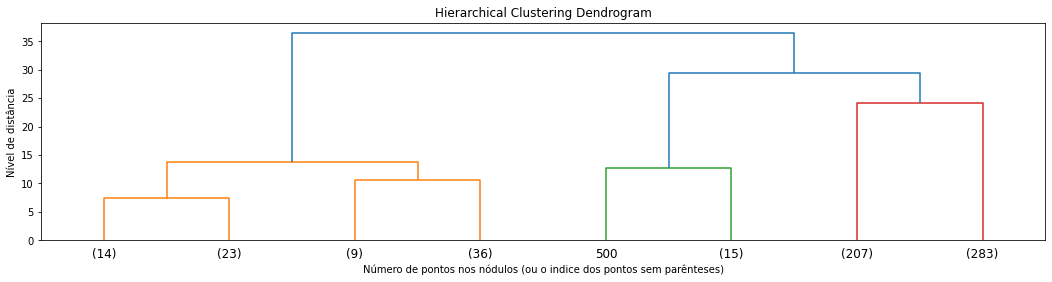

In [9]:
hierarquico_2 = hierarquico_pca.fit(df_chem_pca)
fig = plt.figure(figsize=(18, 4))
plt.title("Hierarchical Clustering Dendrogram")
# Plota os 4 primeiros Componentes Principais
plot_dendrogram(hierarquico_2, truncate_mode="level", p=2)
plt.xlabel("Número de pontos nos nódulos (ou o indice dos pontos sem parênteses)")
plt.ylabel("Nível de distância")
plt.show()

Tivemos o mesmo resultado anterior, então vamos dobrar as ramificações

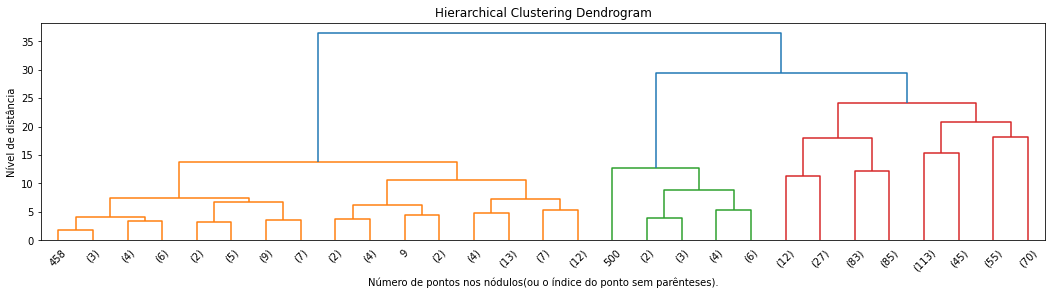

In [10]:
hierarquico_2 = hierarquico_pca.fit(df_chem_pca)
fig = plt.figure(figsize=(18, 4))
plt.title("Hierarchical Clustering Dendrogram")
# Plota os 4 primeiros Componentes Principais
plot_dendrogram(hierarquico_2, truncate_mode="level", p=4)
plt.xlabel("Número de pontos nos nódulos(ou o índice do ponto sem parênteses).")
plt.ylabel("Nível de distância")
plt.show()

Nota-se que o gráfico dendrograma já nos dá as componentes principais do Dataframe, pois é o mesmo que com os dados sem terem sido fitados na função PCA.
Aumentando a quantidade de ramificações dos agrupamentos, a mesma relação de maior quantidade de dados no agrupamento verde ainda é presente. Um ponto interessante é a última (visto da esquerda para direita) ramificação do cluster vermelho, que de possui 70 dados e apresenta uma das menores distância entre os clusters do cluster vermelho com o cluster azul (principal), mostrando que estes dados possuem grande relação com os demais.

### Comparativo: K-Means x Hierarchical Clustering

Tanto K-Means quanto Hierarchical Clustering são métodos para dividir o Dataset, porém por meios diferentes. Enquanto K-Means utiliza das médias dos valores, com base em círculos/esferas, de cada cluster e sua variância para identificar os grupo. Já o Hierarchical Clustering utiliza de minimzar as distâncias de "linkage" entre os dados e os as ramificações. Isso ocorre, principalmente, por meio da minimização da distância média entre pares de clusters, minimização da distância máxima entre pares de clusters e a minimização da distância mais perto entre pares de clusters.
Em linhas gerais, o K-Means necessita de um conhecimento prévio do Dataset, uma vez que é a base para definir o "K"; normalmente menos intenso computacionalmente (melhor para tratar grandes datasets); caso iniciar com um número randômico de clusters, os resultados podem mudar na possibilidade de rodar o algoritmo mais de uma vez; lida muito bem com "dados esféricos/circulares"; nota-se que o valor de "K" é normalmente difícil de prever. Já no Hierárquico os clusters estão aninhados, de modo que o processo tem início com 'n' clusters, que se combinam (somente se similares) para formar um único cluster no fim; os resultados são altamente reprodutíveis; não funcionam tão bem quanto K-Means para "dados esféricos/circulares"; aplicável a qualquer tipo de atributo; necessita de armazenar uma matriz nxn dados, o que é altamente desvantajoso para datasets muito grandes; é possível parar em quaisquer número de clusters.

Para essa análise, o Hirárquico parece ser um modelo mais eficiente em clusterização, uma vez que depende de distâncias por "linkage" e não distâncias por meio de círculos/esferas (nota-se que os dados não são circulares e nem esféricos).